<a href="https://colab.research.google.com/github/farheenfathimaa/TensorFlow-DeepLearning/blob/main/01_neural_network_regression_in_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Regression with Neural Networks in TensorFlow
There are many definitions for a regression problem but in our case, we're going to simplify it: predicting a numerical variable based on some other combination of variables, even shorter... predicting a number.

See full course materials on GitHub: [Notes](https://github.com/mrdbourke/tensorflow-deep-learning/)

In [ ]:
# Import TensorFlow
import tensorflow as tf
print(tf.__version__)

2.15.0


## Creating data to view and fit

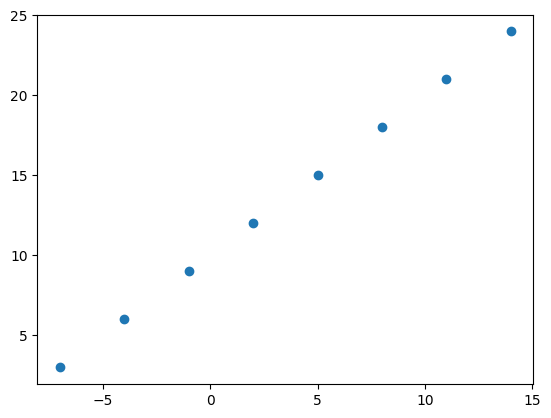

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y);

In [ ]:
y == X +10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and Output shapes

In [ ]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [ ]:
X[0], y[0]

(-7.0, 3.0)

In [ ]:
X[1], y[1]

(-4.0, 6.0)

In [ ]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [ ]:
X[0].ndim

0

In [ ]:
# Turn our NumPy arrays into tensors
X = tf.constant(X)
y = tf.constant(y)
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

## Steps in modelling with TensorFlow
1. **Creating a model** - define the input and output layers, as well as the hidden layers of a deep learning model.
2. **Compiling a model** - define the loss function (in other words, the function which tells our model how wrong it is) and the optimizer (tells our model how to improve the patterns its learning) and evaluation metrics (what we can use to interpret the performance of our model).
3. **Fitting a model** - letting the model try to find patterns between X & y (features and labels).
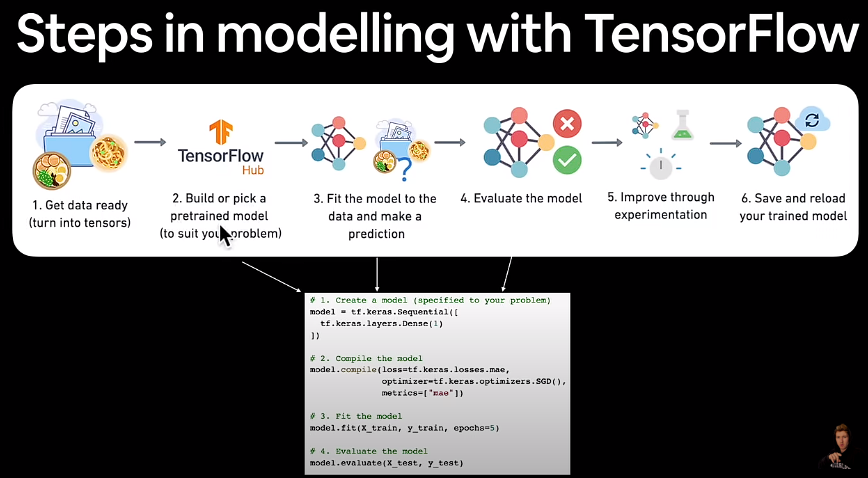

In [ ]:
# optional
# model = tf.keras.Sequential()
# model.add(tf.keras.layers.Dense(1))

In [ ]:
# Reshape X to have a batch dimension
X = tf.expand_dims(X, axis=-1)

# Set random seed
tf.random.set_seed(42)

# 1. Create a model using Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compiler the model
model.compile(loss=tf.keras.losses.mae, # mae is mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # SGD is stochastic gradient descent
              metrics=["mae"])

# 3. Fit the model
model.fit(X, y, epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 491ms/step - loss: 9.9051 - mae: 9.9051
Epoch 2/5
1/1 [==============================] - 0s 9ms/step - loss: 9.7726 - mae: 9.7726
Epoch 3/5
1/1 [==============================] - 0s 10ms/step - loss: 9.6401 - mae: 9.6401
Epoch 4/5
1/1 [==============================] - 0s 9ms/step - loss: 9.5076 - mae: 9.5076
Epoch 5/5
1/1 [==============================] - 0s 9ms/step - loss: 9.3751 - mae: 9.3751


In [ ]:
# Check out X and y
X, y

(<tf.Tensor: shape=(8, 1), dtype=float64, numpy=
 array([[-7.],
        [-4.],
        [-1.],
        [ 2.],
        [ 5.],
        [ 8.],
        [11.],
        [14.]])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
# Try and make a prediction using our model
y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 0s 90ms/step


array([[20.48574]], dtype=float32)

In [ ]:
y_pred + 11

array([[31.48574]], dtype=float32)

## Improving our model
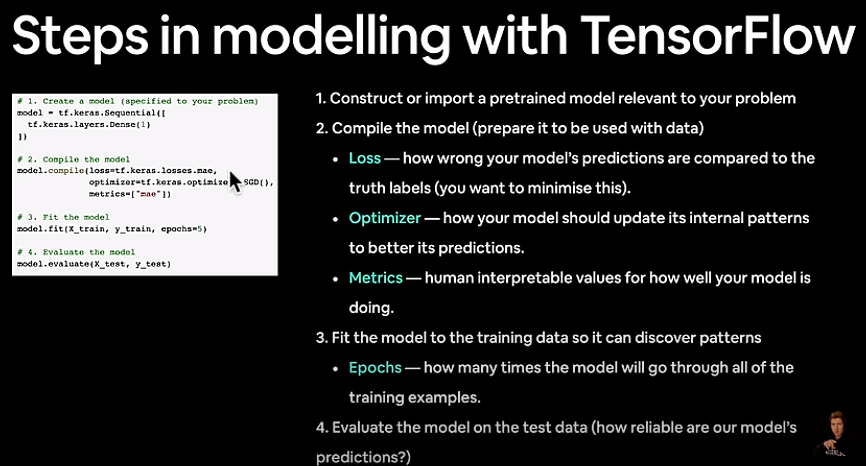

We can improve our model, by altering the steps we took to create a model.

1. **Creating a model** - here we might add more layers, increase the number of hidden units (all called neurons) within each of the hidden layers, change the activation function of each layer.
2. **Compiling a model** - here we might change the optimization function or perhaps the **learning rate** of the optimization function.
3. **Fitting a model** - here we might fit a model for more **epochs** (leave it training for longer) or on more data (give the model more examples to learn from).
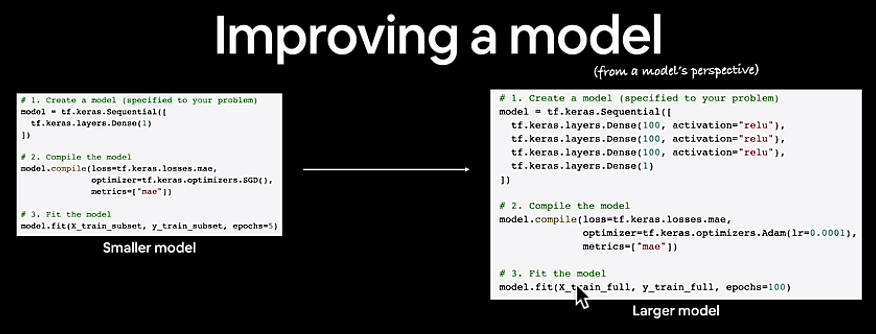

In [ ]:
# Let's rebuild our model

# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. fit the model (this time we'll train for longer)
model.fit(X, y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 354ms/step - loss: 14.2597 - mae: 14.2597
Epoch 2/100
1/1 [==============================] - 0s 9ms/step - loss: 14.1272 - mae: 14.1272
Epoch 3/100
1/1 [==============================] - 0s 8ms/step - loss: 13.9947 - mae: 13.9947
Epoch 4/100
1/1 [==============================] - 0s 11ms/step - loss: 13.8622 - mae: 13.8622
Epoch 5/100
1/1 [==============================] - 0s 9ms/step - loss: 13.7297 - mae: 13.7297
Epoch 6/100
1/1 [==============================] - 0s 9ms/step - loss: 13.5972 - mae: 13.5972
Epoch 7/100
1/1 [==============================] - 0s 9ms/step - loss: 13.4647 - mae: 13.4647
Epoch 8/100
1/1 [==============================] - 0s 10ms/step - loss: 13.3322 - mae: 13.3322
Epoch 9/100
1/1 [==============================] - 0s 11ms/step - loss: 13.1997 - mae: 13.1997
Epoch 10/100
1/1 [==============================] - 0s 9ms/step - loss: 13.0672 - mae: 13.0672
Epoch 11/100
1/1 [==============================] - 0s

In [ ]:
# Remind ourselves of the data
X, y

(<tf.Tensor: shape=(8, 1), dtype=float64, numpy=
 array([[-7.],
        [-4.],
        [-1.],
        [ 2.],
        [ 5.],
        [ 8.],
        [11.],
        [14.]])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
# Let's see if our model's prediction has improved...
model.predict([17.0])

1/1 [==============================] - 0s 98ms/step


array([[29.922716]], dtype=float32)

In [ ]:
# rebuilding the model (this time changing the optimizer(exercise)
# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2.compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["mae"])

# 3. fit the model
model.fit(X, y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 412ms/step - loss: 10.0789 - mae: 10.0789
Epoch 2/100
1/1 [==============================] - 0s 13ms/step - loss: 10.0744 - mae: 10.0744
Epoch 3/100
1/1 [==============================] - 0s 10ms/step - loss: 10.0699 - mae: 10.0699
Epoch 4/100
1/1 [==============================] - 0s 9ms/step - loss: 10.0654 - mae: 10.0654
Epoch 5/100
1/1 [==============================] - 0s 9ms/step - loss: 10.0609 - mae: 10.0609
Epoch 6/100
1/1 [==============================] - 0s 10ms/step - loss: 10.0564 - mae: 10.0564
Epoch 7/100
1/1 [==============================] - 0s 10ms/step - loss: 10.0519 - mae: 10.0519
Epoch 8/100
1/1 [==============================] - 0s 12ms/step - loss: 10.0474 - mae: 10.0474
Epoch 9/100
1/1 [==============================] - 0s 9ms/step - loss: 10.0429 - mae: 10.0429
Epoch 10/100
1/1 [==============================] - 0s 9ms/step - loss: 10.0384 - mae: 10.0384
Epoch 11/100
1/1 [==============================] - 

In [ ]:
# check if the model improved
model.predict([17.0])

1/1 [==============================] - 0s 60ms/step


array([[18.41701]], dtype=float32)

In [ ]:
# Let's see if we can make another to improve our model (video)

# 1. create the model (this time with an extra hidden layer with 100 hidden units)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation=None),
    tf.keras.layers.Dense(1)
])

# 2. compile the model
model.compile(loss="mae",
              optimizer=tf.keras.optimizers.Adam(lr=0.01),
              metrics=["mae"])

# 3. fit the model
model.fit(X, y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 569ms/step - loss: 13.5218 - mae: 13.5218
Epoch 2/100
1/1 [==============================] - 0s 12ms/step - loss: 13.4544 - mae: 13.4544
Epoch 3/100
1/1 [==============================] - 0s 9ms/step - loss: 13.3871 - mae: 13.3871
Epoch 4/100
1/1 [==============================] - 0s 9ms/step - loss: 13.3199 - mae: 13.3199
Epoch 5/100
1/1 [==============================] - 0s 10ms/step - loss: 13.2527 - mae: 13.2527
Epoch 6/100
1/1 [==============================] - 0s 10ms/step - loss: 13.1856 - mae: 13.1856
Epoch 7/100
1/1 [==============================] - 0s 9ms/step - loss: 13.1185 - mae: 13.1185
Epoch 8/100
1/1 [==============================] - 0s 9ms/step - loss: 13.0514 - mae: 13.0514
Epoch 9/100
1/1 [==============================] - 0s 8ms/step - loss: 12.9844 - mae: 12.9844
Epoch 10/100
1/1 [==============================] - 0s 10ms/step - loss: 12.9174 - mae: 12.9174
Epoch 11/100
1/1 [==============================] - 0

In [ ]:
# Let's remind ourselves of the data
X, y

(<tf.Tensor: shape=(8, 1), dtype=float64, numpy=
 array([[-7.],
        [-4.],
        [-1.],
        [ 2.],
        [ 5.],
        [ 8.],
        [11.],
        [14.]])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
# Let's try to make a prediction
model.predict([17.0])

1/1 [==============================] - 0s 78ms/step


array([[31.301554]], dtype=float32)

**Note:** Learning rate is the most important hyperparameter many neutral networks
![image.png](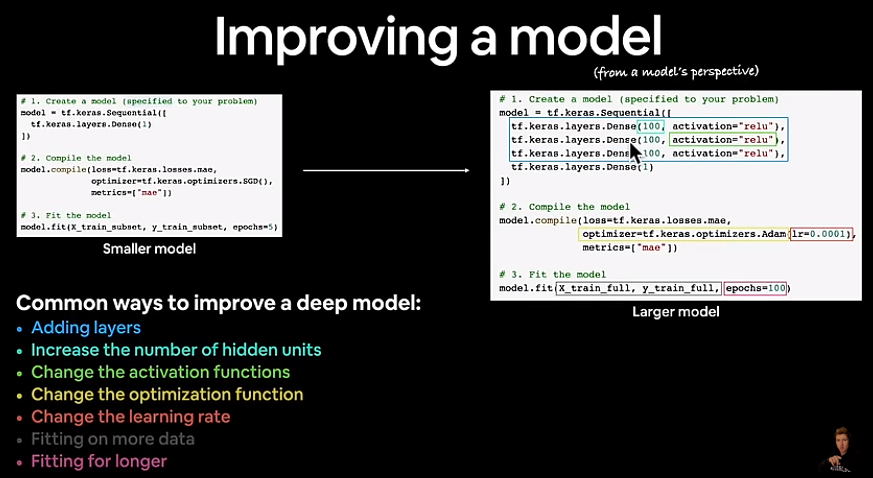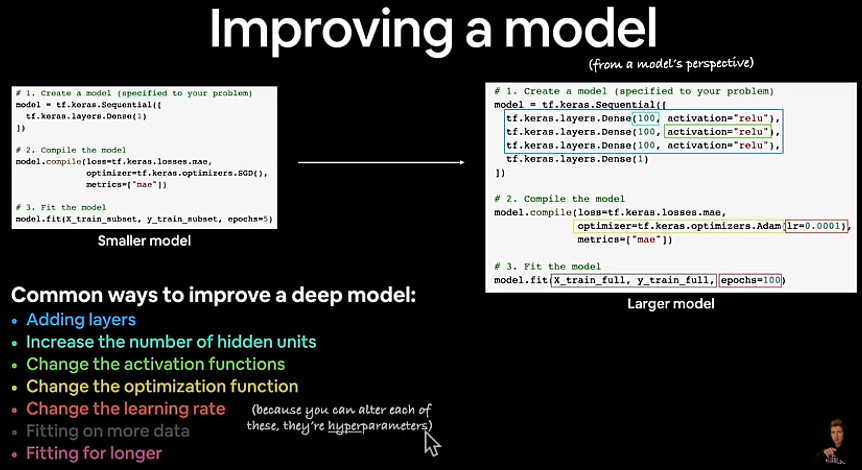)
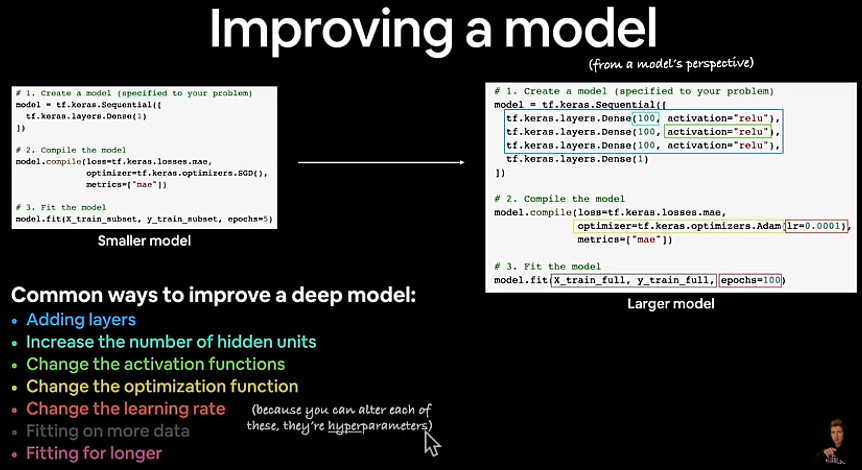

## Evaluting a model
In practice, a typical workflow you'll go through when building neural networks is:

`Build a model  -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it...`

When it comes to evaluation... there are 3 words you should memorize:

> "Visualize, visualize, visualize"

It's a good idea to visualize:

* The data - what data are we working with? What does it look like?
* The model itself - what does our model look like?
* The training of a model - how does a model perform while it learns?
* The predictions of the model - how do the predictions of a model line up against the ground truth (the original labels)?